In [5]:
# First check the Python version
import sys
if sys.version_info < (3,4):
    print('You are running an older version of Python!\n\n' \
          'You should consider updating to Python 3.4.0 or ' \
          'higher as the libraries built for this course ' \
          'have only been tested in Python 3.4 and higher.\n')
    print('Try installing the Python 3.5 version of anaconda '
          'and then restart `jupyter notebook`:\n' \
          'https://www.continuum.io/downloads\n\n')

# Now get necessary libraries
try:
    import os
    import numpy as np
    import matplotlib.pyplot as plt
    from skimage.transform import resize
    from skimage import data
    from scipy.misc import imresize
except ImportError:
    print('You are missing some packages! ' \
          'We will try installing them before continuing!')
    !pip install "numpy>=1.11.0" "matplotlib>=1.5.1" "scikit-image>=0.11.3" "scikit-learn>=0.17" "scipy>=0.17.0"
    import os
    import numpy as np
    import matplotlib.pyplot as plt
    from skimage.transform import resize
    from skimage import data
    from scipy.misc import imresize
    print('Done!')

# Import Tensorflow
try:
    import tensorflow as tf
except ImportError:
    print("You do not have tensorflow installed!")
    print("Follow the instructions on the following link")
    print("to install tensorflow before continuing:")
    print("")
    print("https://github.com/pkmital/CADL#installation-preliminaries")

# This cell includes the provided libraries from the zip file
# and a library for displaying images from ipython, which
# we will use to display the gif
try:
    from libs import utils, gif
    import IPython.display as ipyd
except ImportError:
    print("Make sure you have started notebook in the same directory" +
          " as the provided zip file which includes the 'libs' folder" +
          " and the file 'utils.py' inside of it.  You will NOT be able"
          " to complete this assignment unless you restart jupyter"
          " notebook inside the directory created by extracting"
          " the zip file or cloning the github repo.")

# We'll tell matplotlib to inline any drawn figures like so:
%matplotlib inline
plt.style.use('ggplot')

In [6]:
# Bit of formatting because I don't like the default inline code style:
from IPython.core.display import HTML
HTML("""<style> .rendered_html code { 
    padding: 2px 4px;
    color: #c7254e;
    background-color: #f9f2f4;
    border-radius: 4px;
} </style>""")

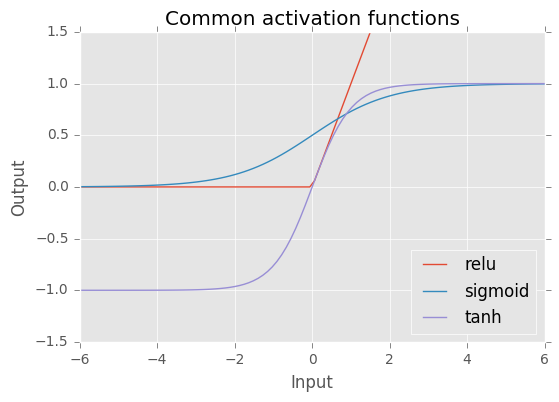

In [7]:
xs = np.linspace(-6,6,100)
plt.plot(xs, np.maximum(xs, 0.0), label='relu')
plt.plot(xs, 1.0/(1.0 + np.exp(-xs)), label='sigmoid')
plt.plot(xs, np.tanh(xs), label='tanh')
plt.xlim([-6,6])
plt.xlabel('Input')
plt.ylim([-1.5,1.5])
plt.ylabel('Output')
plt.title('Common activation functions')
plt.legend(loc='lower right')
plt.show()

In [8]:
# define neural network

X = tf.placeholder(tf.float32, shape=(None, 2), name='X')

W = tf.get_variable(name='W', 
                    shape=[2, 20], 
                    dtype=tf.float32, 
                    initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))

b = tf.get_variable(name='b',
                   shape=[20],
                   dtype=tf.float32,
                   initializer=tf.constant_initializer())

h = tf.matmul(X,W)
h = tf.nn.bias_add(h, b)

print(X.get_shape(), W.get_shape(), b.get_shape(), h.get_shape())

(?, 2) (2, 20) (20,) (?, 20)


In [9]:
from libs import utils

In [10]:
utils.linear??

In [11]:
h, W = utils.linear(x=X, n_output=20, name='linear', activation=tf.nn.relu)

# Image Painting Network

In [14]:
# prepare data

img = plt.imread('ee.jpg')

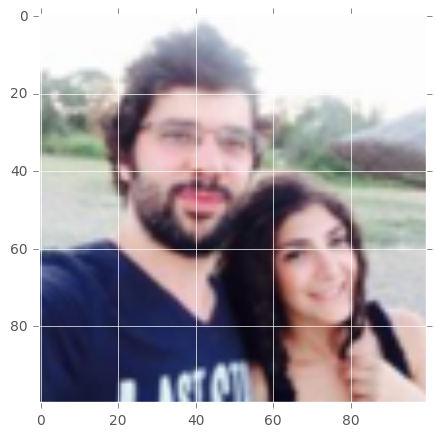

In [15]:
img = imresize(img, (100,100))
plt.figure(figsize=(5,5))
plt.imshow(img)

In [16]:
plt.imsave(arr=img, fname='reference.jpg')

In [25]:
def img_to_arr(img):
    """
    Converts given image into input format of nn
    two dim input and 3 dim output
    """
    # all the positinos of the pixesl
    xs = []
    
    # and color values of pixels
    ys = []
    
    for row_i in range(img.shape[0]):
        for col_i in range(img.shape[1]):
            xs.append([row_i, col_i])
            ys.append(img[row_i, col_i])
    
    xs = np.array(xs)
    ys = np.array(ys)
    
    return xs, ys

In [26]:
xs, ys = img_to_arr(img)
xs.shape, ys.shape

((10000, 2), (10000, 3))

In [27]:
# normalize input
xs = (xs - np.mean(xs))/(np.std(xs))

In [28]:
# test if the normalization is ok
print(np.min(xs), np.max(xs))
assert(np.min(xs) > -3.0 and np.max(xs)<3.0)

-1.71481604244 1.71481604244


In [29]:
# normalize output
ys = ys / 255.0
print(np.min(ys), np.max(ys))

0.0117647058824 1.0


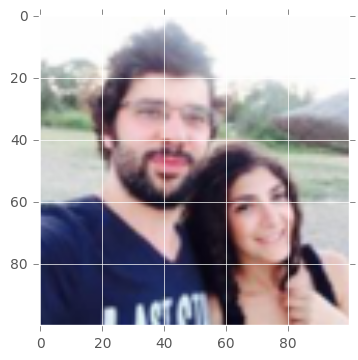

In [30]:
# input x : pixel coordinates [i, j]
# output y: target pixel rgb values [r,g,b]

plt.imshow(ys.reshape(img.shape))

In [94]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=[None, 2], name='X')
Y = tf.placeholder(dtype=tf.float32, shape=[None, 3], name='Y')

In [95]:
n_neurons = 20

h1, W1 = utils.linear(x=X, n_output=n_neurons, name='linear1', activation=tf.nn.relu)
h2, W2 = utils.linear(x=h1, n_output=n_neurons, name='linear2', activation=tf.nn.relu)
h3, W3 = utils.linear(x=h2, n_output=n_neurons, name='linear3', activation=tf.nn.relu)
h4, W4 = utils.linear(x=h3, n_output=n_neurons, name='linear4', activation=tf.nn.relu)
h5, W5 = utils.linear(x=h4, n_output=n_neurons, name='linear5', activation=tf.nn.relu)
h6, W6 = utils.linear(x=h5, n_output=n_neurons, name='linear6', activation=tf.nn.relu)

Y_pred, W7 = utils.linear(x=h6, n_output=3, name='pred', activation=None)

In [96]:
assert(X.get_shape().as_list() == [None, 2])
assert(Y.get_shape().as_list() == [None, 3])
assert(Y_pred.get_shape().as_list() == [None, 3])

Let's say our error is E, then the cost will be:
$$cost(\textbf{Y}, \hat{\textbf{Y}}) = \frac{1}{\text{B}} \displaystyle\sum\limits_{b=0}^{\text{B}} \textbf{E}_b $$
where the error is measured as, e.g.:
$$\textbf{E} = \displaystyle\sum\limits_{c=0}^{\text{C}} (\textbf{Y}_{c} - \hat{\textbf{Y}}_{c})^2$$

The equation for computing cost I mentioned above is more succintly written as, for $l_2$ norm:
$$cost(\textbf{Y}, \hat{\textbf{Y}}) = \frac{1}{\text{B}} \displaystyle\sum\limits_{b=0}^{\text{B}} \displaystyle\sum\limits_{c=0}^{\text{C}} (\textbf{Y}_{c} - \hat{\textbf{Y}}_{c})^2$$
For $l_1$ norm, we'd have:
$$cost(\textbf{Y}, \hat{\textbf{Y}}) = \frac{1}{\text{B}} \displaystyle\sum\limits_{b=0}^{\text{B}} \displaystyle\sum\limits_{c=0}^{\text{C}} \text{abs}(\textbf{Y}_{c} - \hat{\textbf{Y}}_{c})$$

In [97]:
error = tf.square(Y_pred - Y)

In [98]:
print(error.get_shape())
assert(error.get_shape().as_list() == [None, 3])

(?, 3)


In [99]:
sum_error = tf.reduce_sum(error, reduction_indices=1)

In [100]:
print(sum_error.get_shape().as_list())
assert(sum_error.get_shape().as_list() == [None])

[None]


In [106]:
cost = tf.reduce_mean(tf.reduce_sum(tf.abs(Y_pred - Y), reduction_indices=1))
print(cost.get_shape().as_list())

[]


In [107]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(sum_error)

n_iterations = 5000
batch_size = 50

sess = tf.Session()

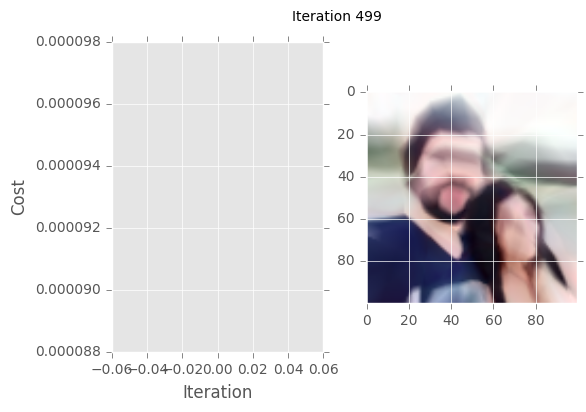

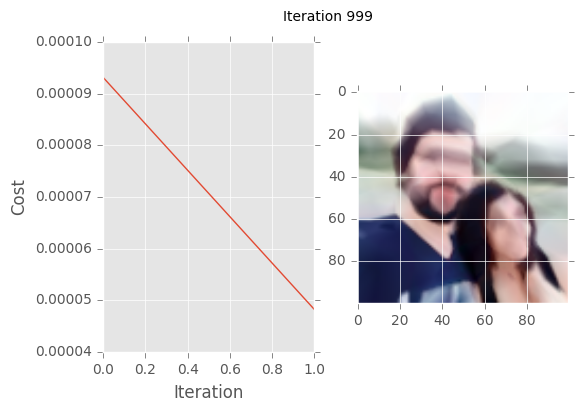

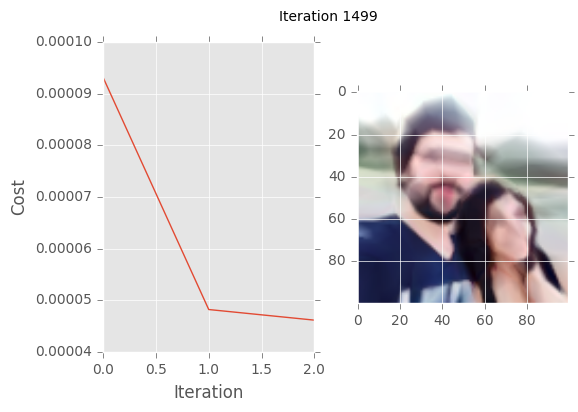

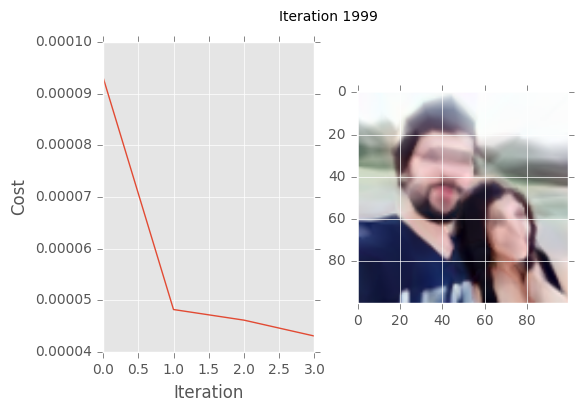

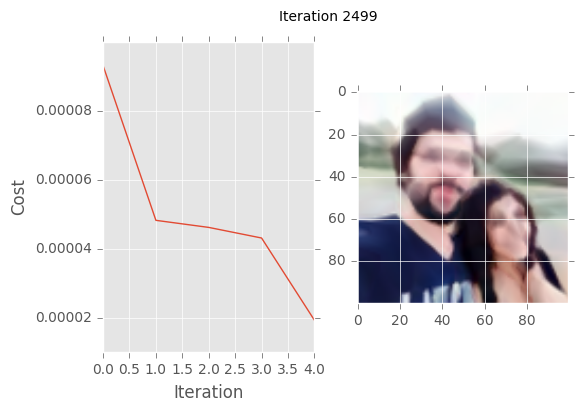

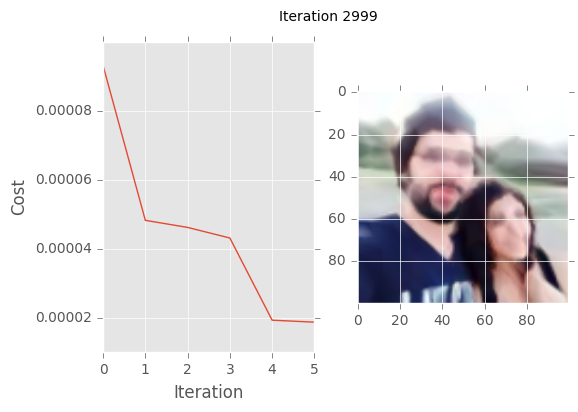

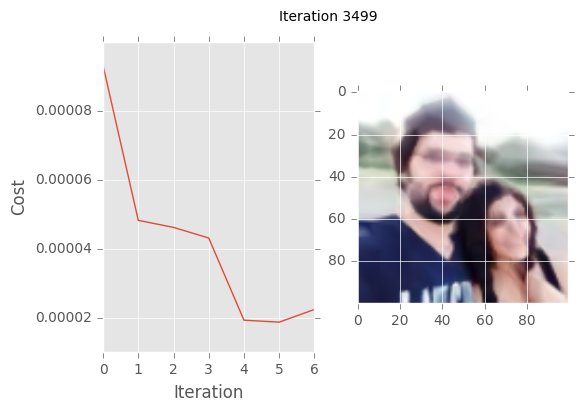

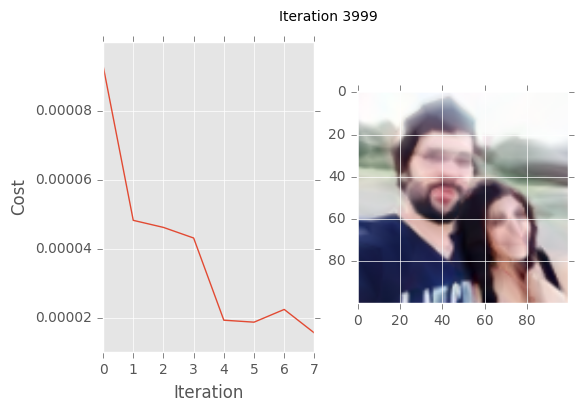

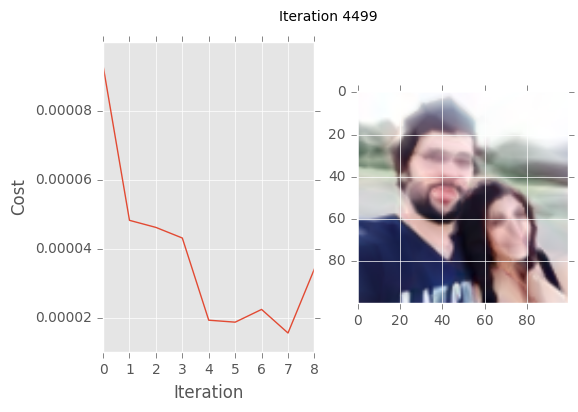

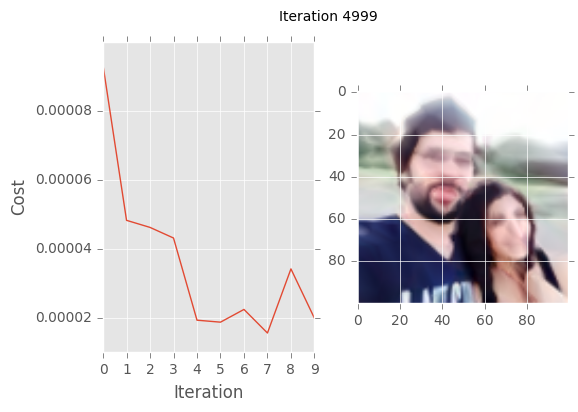

In [103]:
sess.run(tf.global_variables_initializer())

imgs = []
costs = []
gif_step = n_iterations // 10

step_i = 0

for it_i in range(n_iterations):
    # get a random sampling of dataset
    idxs = np.random.permutation(range(len(xs)))
    n_batches = len(xs) // batch_size
    
    for batch_i in range(n_batches):
        idxs_i = idxs[batch_i*batch_size:(batch_i+1)*batch_size]
        training_cost = sess.run([cost, optimizer], feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})[0]
        
    if (it_i + 1)%gif_step == 0:
        costs.append(training_cost / n_batches)
        ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
        img = np.clip(ys_pred.reshape(img.shape), 0, 1)
        imgs.append(img)
        # Plot the cost over time
        fig, ax = plt.subplots(1, 2)
        ax[0].plot(costs)
        ax[0].set_xlabel('Iteration')
        ax[0].set_ylabel('Cost')
        ax[1].imshow(img)
        fig.suptitle('Iteration {}'.format(it_i))
        plt.show()

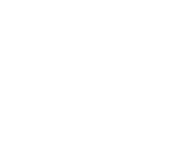

In [104]:
# Save the images as a GIF
_ = gif.build_gif(imgs, saveto='single4.gif', show_gif=False)

In [105]:
ipyd.Image(url='single4.gif?{}'.format(np.random.rand()),
           height=500, width=500)